In [2]:
import xlrd
import pandas as pd

In [87]:
df = pd.read_excel("/Users/sphynx/Code/Learning_Python/Example.xlsx")

In [88]:
df.head()

,runDate,dontNeed,captureDuration
0,NaN,NaN,NaN
1,2019-11-23 00:00:00.000,2019-11-23 00:00:00.000,2019-11-23 02:15:50.600
2,2019-11-22 00:00:00.000,2019-11-22 00:00:00.000,2019-11-22 04:20:09.080
3,2019-11-21 00:00:00.000,2019-11-21 00:00:00.000,2019-11-21 03:10:50.700
4,2019-11-20 00:00:00.000,2019-11-20 00:00:00.000,2019-11-20 01:01:50.003


In [89]:
df = df.dropna(how='all') # note that we reassign here to df again

# or you can use the following to modify `df` in place: 
# df.dropna(how='all', inplace=True)

In [90]:
# Now let's check if it's dropped:
df

,runDate,dontNeed,captureDuration
1,2019-11-23 00:00:00.000,2019-11-23 00:00:00.000,2019-11-23 02:15:50.600
2,2019-11-22 00:00:00.000,2019-11-22 00:00:00.000,2019-11-22 04:20:09.080
3,2019-11-21 00:00:00.000,2019-11-21 00:00:00.000,2019-11-21 03:10:50.700
4,2019-11-20 00:00:00.000,2019-11-20 00:00:00.000,2019-11-20 01:01:50.003


Good!

In [91]:
df.drop('dontNeed', axis=1, inplace=True)

In [92]:
df

,runDate,captureDuration
1,2019-11-23 00:00:00.000,2019-11-23 02:15:50.600
2,2019-11-22 00:00:00.000,2019-11-22 04:20:09.080
3,2019-11-21 00:00:00.000,2019-11-21 03:10:50.700
4,2019-11-20 00:00:00.000,2019-11-20 01:01:50.003


In [93]:
# let's look what is the type of those columns:
type(df.runDate.iloc[0])

str

In [94]:
# they are just strings, hm, I'd like them to be Pandas date/times
# (because then we can use some nice functions on dates and times).

# I think that is a fault of read_excel function, it should handled it better.
# Let's look at its documentation

# ... <googles for "pandas read_excel">

# Here we go:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [95]:
# It has a bunch of parameters! Including skipping rows/columns/etc.
# Also, it has `parse_dates` parameter which seems to be what I want, cool! 
# Let's try all this stuff and reload the data again:

In [99]:
df = pd.read_excel("/Users/sphynx/Code/Learning_Python/Example.xlsx", parse_dates=True, index_col=None)
# I pass index_col as well, because for some reason using parse_dates requires it

In [100]:
df

,runDate,dontNeed,captureDuration
0,NaN,NaN,NaN
1,2019-11-23 00:00:00.000,2019-11-23 00:00:00.000,2019-11-23 02:15:50.600
2,2019-11-22 00:00:00.000,2019-11-22 00:00:00.000,2019-11-22 04:20:09.080
3,2019-11-21 00:00:00.000,2019-11-21 00:00:00.000,2019-11-21 03:10:50.700
4,2019-11-20 00:00:00.000,2019-11-20 00:00:00.000,2019-11-20 01:01:50.003


In [101]:
type(df.runDate.iloc[1])

str

In [102]:
# Hm, it does not seem to help. Ok, let's try to just convert string to datetime using pandas function:

In [103]:
pd.to_datetime(df.captureDuration.iloc[1])

Timestamp('2019-11-23 02:15:50.600000')

In [104]:
# Yay, works!

In [105]:
# Now we can do whatever we want with that timestamp:

# Docs are here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html
datetime = pd.to_datetime(df.captureDuration.iloc[1])

# To convert it to date:
datetime.date()

datetime.date(2019, 11, 23)

In [106]:
# To extract time:
datetime.time()

datetime.time(2, 15, 50, 600000)

In [107]:
# Ok, let's try to just convert strings to datetime after the loading, for that we can use pd.to_datetime 
# (again, we can easily find this out by googling 'pandas convert string to date' and following advice from StackOverflow)

# Let's first look at the types of all our columns:
df.info() # gives an overview of all columns and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
runDate            4 non-null object
dontNeed           4 non-null object
captureDuration    4 non-null object
dtypes: object(3)
memory usage: 200.0+ bytes


In [108]:
# Now the conversion part, we convert two columns:
df.captureDuration = pd.to_datetime(df.captureDuration)
df.runDate = pd.to_datetime(df.runDate)

In [109]:
df.info() # gives an overview of all columns and their types
# now we can see that runDate is "datetime64[ns]", i.e. it has been converted to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
runDate            4 non-null datetime64[ns]
dontNeed           4 non-null object
captureDuration    4 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(1)
memory usage: 200.0+ bytes


In [110]:
# we can use .dt selector to access date time functions (discovered via StackOverflow and pandas documentation):
df.captureDuration.dt.time

0                NaT
1    02:15:50.600000
2    04:20:09.080000
3    03:10:50.700000
4    01:01:50.003000
Name: captureDuration, dtype: object

In [111]:
# or we can apply functions to columns:
# see here: https://stackoverflow.com/questions/17951820/convert-hhmmss-to-minutes-using-python-pandas
df.captureDuration.apply(lambda dur: dur.hour * 60 + dur.minute)

0      NaN
1    135.0
2    260.0
3    190.0
4     61.0
Name: captureDuration, dtype: float64

In [112]:
# ok, let's combine everything together:

# load
df = pd.read_excel("/Users/sphynx/Code/Learning_Python/Example.xlsx")

# clean
df.dropna(how='all', inplace=True)
df.drop('dontNeed', axis=1, inplace=True)

# convert strings to dates
df.captureDuration = pd.to_datetime(df.captureDuration)
df.runDate = pd.to_datetime(df.runDate)

df.runDate = df.runDate.dt.date
df.captureDuration = df.captureDuration.apply(lambda dur: dur.hour * 60 + dur.minute + dur.second / 60)
df

,runDate,captureDuration
1,2019-11-23,135.833333
2,2019-11-22,260.150000
3,2019-11-21,190.833333
4,2019-11-20,61.833333


In [113]:
# Let's make the date our index:
df = df.set_index('runDate')
df

,captureDuration
runDate,
2019-11-23,135.833333
2019-11-22,260.150000
2019-11-21,190.833333
2019-11-20,61.833333


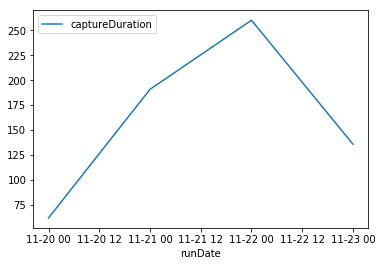

In [114]:
# And plot the thing:

%matplotlib inline
df.plot();

In [115]:
# Date labels look bad, we can fix that later by using a custom axis formatter, I believe